<a href="https://colab.research.google.com/github/Usman-938/Assignments/blob/main/Home_work_2_week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform regression analysis on a dataset selected from 'https://github.com/selva86/datasets', including Exploratory Data Analysis (EDA), data preprocessing, training, and testing a regression model for continuous data, and summarizing the findings.

## Select Dataset

### Subtask:
Choose a suitable dataset for regression analysis from the provided repository: 'https://github.com/selva86/datasets'. This will involve listing available datasets and selecting one that is appropriate for continuous data regression.


**Reasoning**:
To list the available datasets from the specified GitHub repository, I will use the `requests` library to access the GitHub API and fetch the contents of the repository's root directory. This will provide a programmatic way to see the file names and directories.



In [3]:
import requests

repo_owner = 'selva86'
repo_name = 'datasets'
api_url = f'https://api.github.com/repos/{repo_owner}/{repo_name}/contents/'

# Fetch the contents of the repository
response = requests.get(api_url)
response.raise_for_status() # Raise an exception for HTTP errors

contents = response.json()

print("Available datasets and directories in the repository:\n")
for item in contents:
    if item['type'] == 'file':
        print(f"File: {item['name']}")
    elif item['type'] == 'dir':
        print(f"Directory: {item['name']}/")


Available datasets and directories in the repository:

File: .Rapp.history
File: .Rhistory
File: 1M.csv
File: Admission.csv
File: Advertising.csv
File: AirPassengers.csv
File: Auto.csv
File: Auto.rds
File: BCF.csv
File: BostonHousing.csv
File: BostonHousing.rds
File: BreastCancer.csv
File: BreastCancer.rds
File: CNAE9.csv
File: Cars93.csv
File: Cars93.rds
File: Cars93_miss.csv
File: Carseats.csv
File: Carseats.rds
File: ChickWeight.csv
File: Churn_Modelling.csv
File: Churn_Modelling_m.csv
File: Clothing_Reviews_Small.csv
File: College.csv
File: College.rds
File: GermanCredit.csv
File: GermanCredit.rds
File: Glass.csv
File: Glass.rds
File: GlaucomaM.csv
File: HamiltonGDP.csv
File: Hitters.csv
File: Hitters.rds
File: HouseVotes84.csv
File: HouseVotes84.rds
File: Ionosphere.csv
File: Ionosphere.rds
File: Iris.csv
File: IsraelPalestine.csv
File: Khan.rds
File: LetterRecognition.csv
File: LetterRecognition.rds
File: LifeCycleSavings
File: Life_Expectancy_Data.csv
File: Mall_Customers_Int.cs

**Reasoning**:
From the list of available datasets, 'BostonHousing.csv' is a classic dataset often used for regression analysis involving continuous data, making it a suitable choice for this task. I will now download this dataset to a pandas DataFrame and display its first few rows to confirm the data is loaded correctly.



In [4]:
import pandas as pd

dataset_url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
df = pd.read_csv(dataset_url)

print("First 5 rows of the BostonHousing dataset:")
print(df.head())

First 5 rows of the BostonHousing dataset:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


## Perform EDA

### Subtask:
Conduct Exploratory Data Analysis (EDA) on the dataset. This includes generating descriptive statistics, visualizing data distributions, checking for correlations, and identifying potential outliers or missing values relevant for regression analysis. I will generate appropriate plots with legends.


**Reasoning**:
To begin the EDA, I will display a concise summary of the DataFrame `df` using the `.info()` method to inspect the data types and non-null counts, which is crucial for identifying potential data quality issues.



In [5]:
print("DataFrame Info:")
df.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


**Reasoning**:
Next, I will generate descriptive statistics for all numerical columns in the DataFrame using the `.describe()` method. This will provide key statistical measures such as mean, standard deviation, min, max, and quartiles, which are essential for understanding the data's central tendency, dispersion, and shape.



In [6]:
print("Descriptive statistics for the dataset:")
print(df.describe())

Descriptive statistics for the dataset:
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  3

**Reasoning**:
Now, I will check for any missing values in the DataFrame and display their counts for each column using `.isnull().sum()` to identify data completeness issues.



In [7]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


**Reasoning**:
Next, I will create histograms for all numerical columns in the DataFrame to visualize their distributions. This will help in understanding the shape, spread, and potential skewness of each feature. I will import `matplotlib.pyplot` and `seaborn` for this plotting.



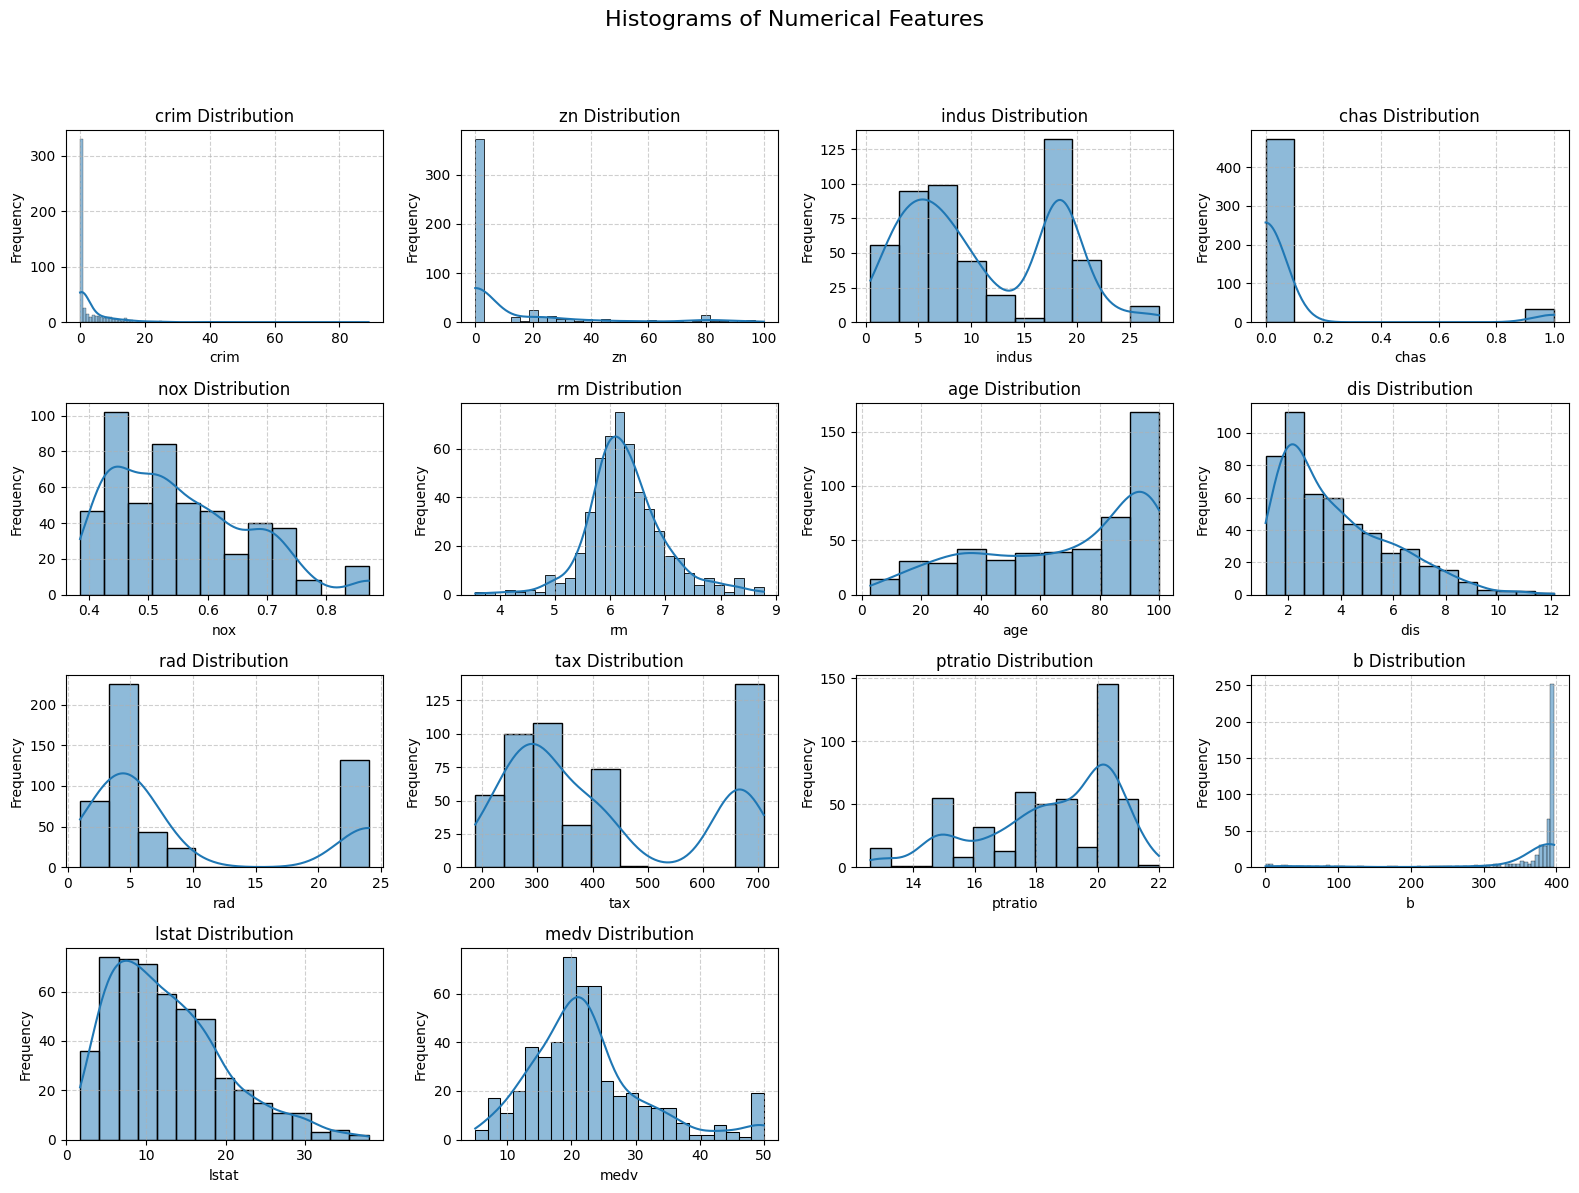

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get numerical columns (all columns in this dataset are numerical)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of rows and columns for the subplot grid
num_cols = 4 # Number of columns in the subplot grid
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols # Calculate rows needed

plt.figure(figsize=(num_cols * 4, num_rows * 3))
plt.suptitle('Histograms of Numerical Features', y=1.02, fontsize=16)

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent suptitle overlap
plt.show()

**Reasoning**:
To identify potential outliers in the dataset, I will generate box plots for each numerical column. This visualization effectively shows the distribution, median, quartiles, and any data points that fall outside the whiskers, which are considered outliers.



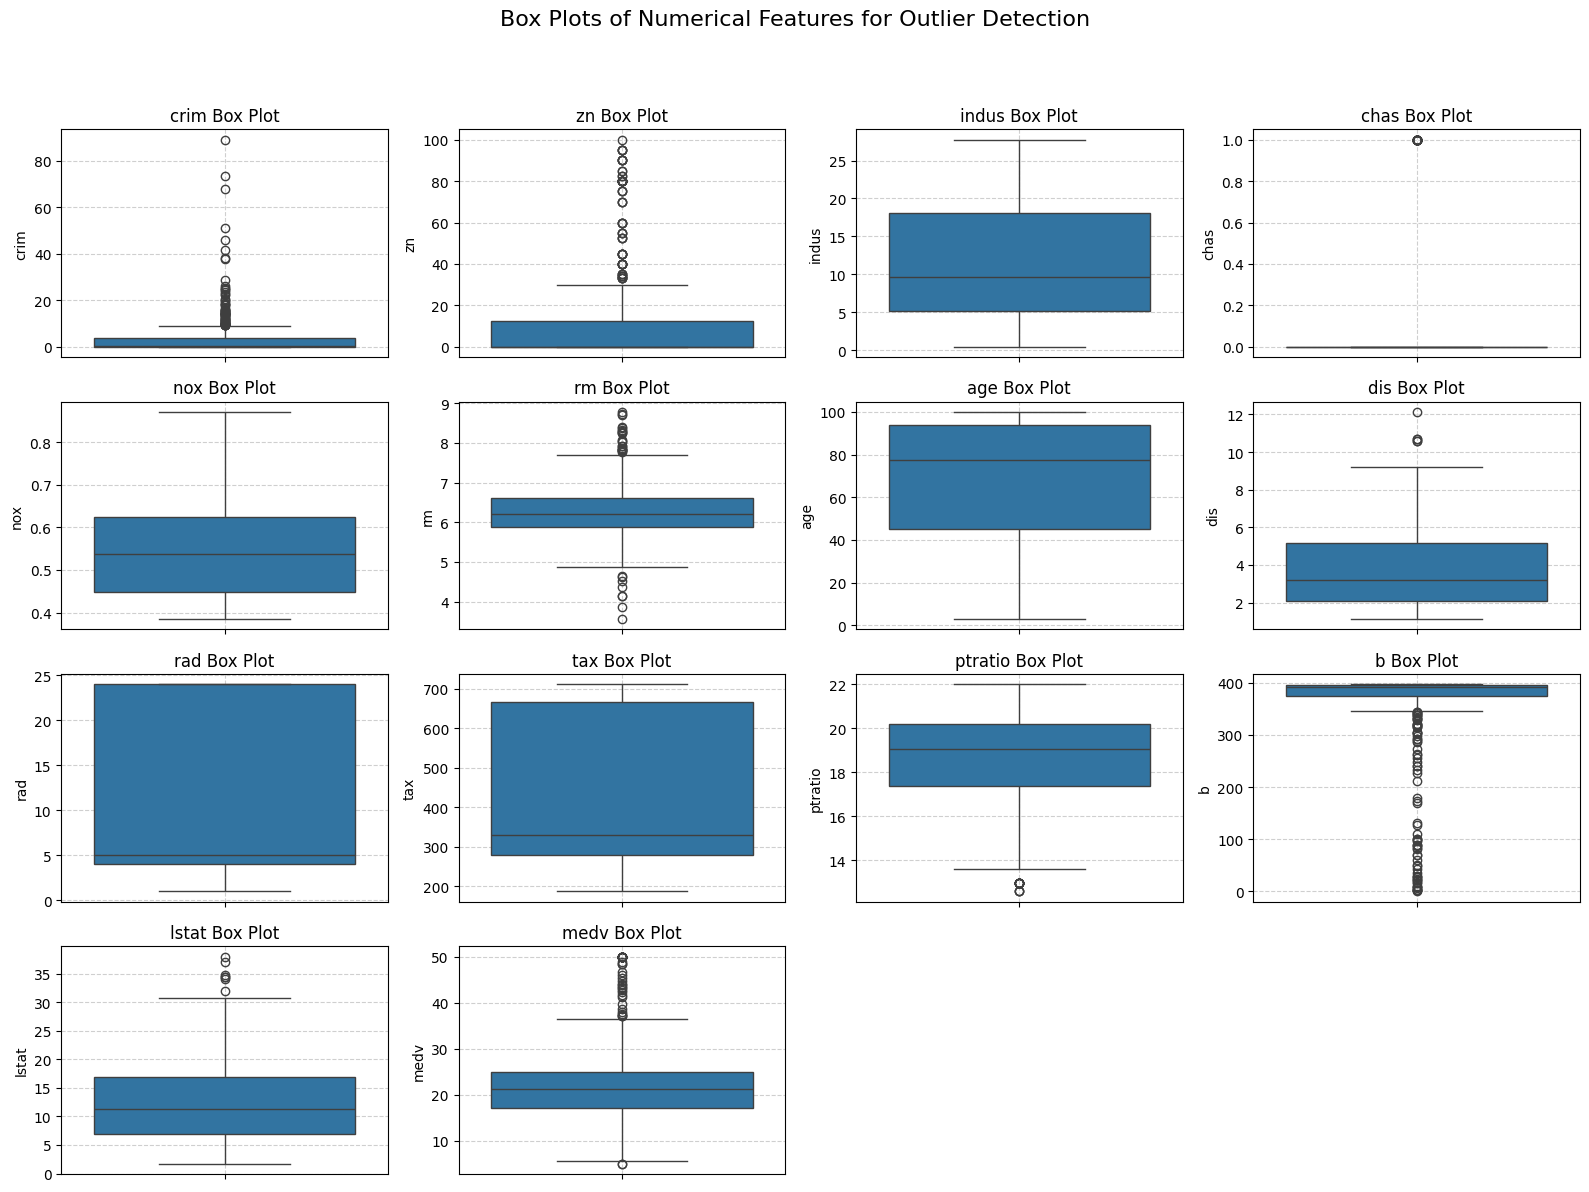

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

num_cols = 4  # Number of columns in the subplot grid
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols  # Calculate rows needed

plt.figure(figsize=(num_cols * 4, num_rows * 3))
plt.suptitle('Box Plots of Numerical Features for Outlier Detection', y=1.02, fontsize=16)

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'{col} Box Plot')
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent suptitle overlap
plt.show()

**Reasoning**:
Now that the distributions and potential outliers have been visualized, I will compute the correlation matrix for all numerical columns in the DataFrame using the `.corr()` method. This will help in understanding the linear relationships between variables.



In [10]:
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
b       

**Reasoning**:
To visually represent the correlation matrix and easily identify strong and weak correlations between variables, I will use a heatmap with annotations. This will provide a clear overview of the linear relationships within the dataset.



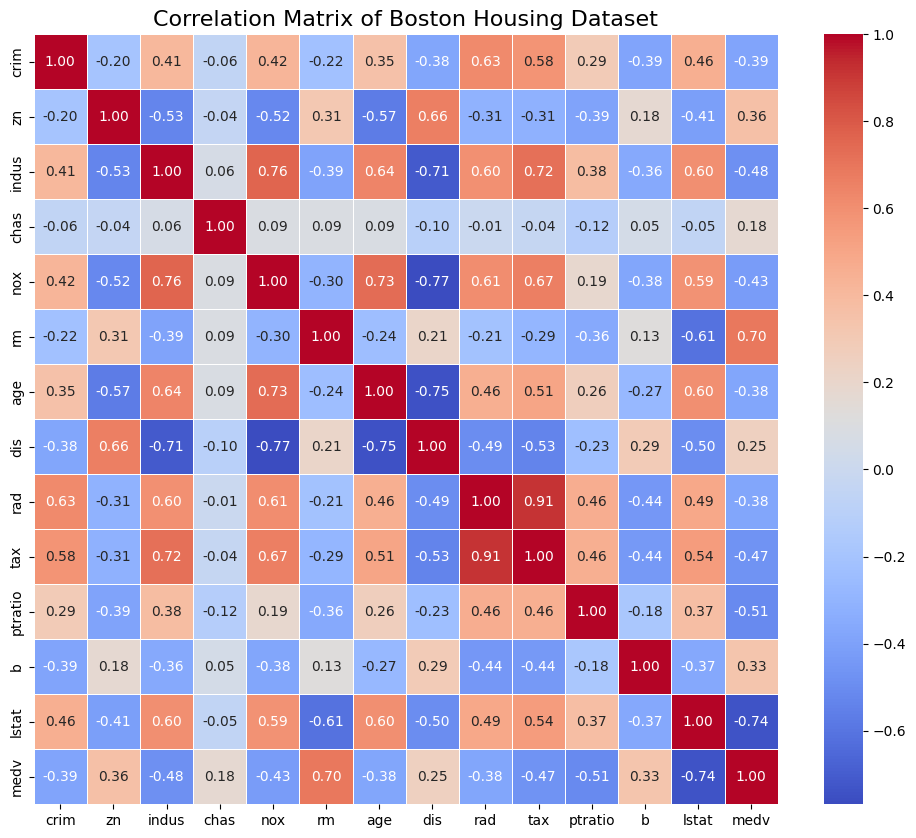

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Boston Housing Dataset', fontsize=16)
plt.show()

## Choose Regression Model

### Subtask:
Select and briefly describe a new regression model suitable for continuous data.


## Choose Regression Model

### Subtask:
Select and briefly describe a new regression model suitable for continuous data.

#### Instructions
1. Choose a regression model suitable for continuous data. For this task, the `RandomForestRegressor` model will be used.
2. Briefly describe the `RandomForestRegressor` model, including its general principles and why it is a suitable choice for this regression task.

**Reasoning**:
For this task, I have chosen the `RandomForestRegressor` model because it is a powerful and versatile ensemble learning method that is well-suited for regression problems with continuous data. It can handle a large number of features, is less prone to overfitting compared to single decision trees, and can capture complex non-linear relationships in the data.

**RandomForestRegressor Description**:

The `RandomForestRegressor` is an ensemble learning method for regression that operates by constructing a multitude of decision trees at training time and outputting the mean prediction of the individual trees. It is an extension of the bagging technique, where each tree in the forest is built from a random subset of the training data (bootstrapping) and, crucially, at each split point in the tree-building process, a random subset of features is considered. This dual randomness (data sampling and feature sampling) helps to decorrelate the trees, making the ensemble more robust and reducing overfitting.

**Key principles**:

*   **Ensemble Learning**: It combines multiple individual models (decision trees) to produce a more accurate and stable prediction than a single model.
*   **Bootstrapping (Bagging)**: Each tree is trained on a different bootstrap sample of the training data. This introduces diversity among the trees.
*   **Feature Randomness**: At each node split, only a random subset of features is considered. This prevents a single dominant feature from dictating the structure of all trees.
*   **Averaging Predictions**: For regression, the final prediction is the average of the predictions from all the individual decision trees.

**Suitability for Continuous Data Regression**:

*   **High Accuracy**: Random Forests generally provide high accuracy and good performance on many regression tasks.
*   **Handles Non-linearity**: It can model complex non-linear relationships between features and the target variable without requiring explicit feature engineering for interactions.
*   **Robust to Outliers and Noise**: The ensemble nature and averaging of predictions make it less sensitive to outliers and noisy data compared to single models.
*   **Feature Importance**: It can provide insights into feature importance, indicating which features are most influential in predicting the target variable.
*   **No Scaling Required**: Tree-based methods like Random Forests are not sensitive to the scale of the features, so feature scaling is generally not required.

## Preprocess Data

### Subtask:
Prepare the dataset for the chosen regression model. This will involve handling missing values, encoding categorical variables, scaling numerical features, and splitting the data into training and testing sets.


**Reasoning**:
To prepare the dataset for regression analysis, I will first define the features (X) and the target variable (y), where 'medv' is the target. Then, I will split the data into training and testing sets using `train_test_split` from `sklearn.model_selection` to ensure the model can be evaluated on unseen data.



In [12]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop('medv', axis=1)
y = df['medv']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (404, 13)
Shape of X_test: (102, 13)
Shape of y_train: (404,)
Shape of y_test: (102,)


### Data Preprocessing Summary:

*   **Missing Values**: No missing values were found in the dataset, so no imputation was required.
*   **Categorical Variables**: All features in the dataset are numerical, so no categorical encoding was necessary.
*   **Feature Scaling**: While feature scaling (e.g., standardization or normalization) is often a crucial step in preparing data for many machine learning models (like SVMs or neural networks), tree-based models such as `RandomForestRegressor` are generally robust to the scale of features. Decision trees operate by finding split points based on feature values, and the absolute scale does not affect the relative order of these values or the impurity reduction calculation. Therefore, explicit feature scaling is not strictly required for `RandomForestRegressor` and has been omitted.

At this point, the data is split into training and testing sets and is ready for model training.

### Data Preprocessing Summary:

*   **Missing Values**: No missing values were found in the dataset, so no imputation was required.
*   **Categorical Variables**: All features in the dataset are numerical, so no categorical encoding was necessary.
*   **Feature Scaling**: While feature scaling (e.g., standardization or normalization) is often a crucial step in preparing data for many machine learning models (like SVMs or neural networks), tree-based models such as `RandomForestRegressor` are generally robust to the scale of features. Decision trees operate by finding split points based on feature values, and the absolute scale does not affect the relative order of these values or the impurity reduction calculation. Therefore, explicit feature scaling is not strictly required for `RandomForestRegressor` and has been omitted.

At this point, the data is split into training and testing sets and is ready for model training.

## Train and Test Model

### Subtask:
Train the selected regression model on the preprocessed training data and evaluate its performance using the test data. I will calculate and display relevant regression metrics (e.g., R-squared, Mean Absolute Error, Mean Squared Error).


**Reasoning**:
To begin training and evaluation, I will import the `RandomForestRegressor` model and the necessary regression metrics (`r2_score`, `mean_absolute_error`, `mean_squared_error`) from `sklearn`. Then, I will instantiate the model and train it using the training data (`X_train`, `y_train`). After training, I will make predictions on the test data (`X_test`) and calculate the R-squared, MAE, and MSE to assess the model's performance.



In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Instantiate the RandomForestRegressor model
# Using random_state for reproducibility
model = RandomForestRegressor(random_state=42)

# Train the model
print("Training the RandomForestRegressor model...")
model.fit(X_train, y_train)
print("Model training complete.")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print(f"\nModel Evaluation Metrics:")
print(f"R-squared (R2): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

Training the RandomForestRegressor model...
Model training complete.

Model Evaluation Metrics:
R-squared (R2): 0.8923
Mean Absolute Error (MAE): 2.0395
Mean Squared Error (MSE): 7.9015


## Final Task

### Subtask:
Summarize the findings from the EDA, the chosen regression model, its training process, and the evaluation results. Provide insights into the model's performance.


## Summary:

### Data Analysis Key Findings

*   **Dataset Overview**: The 'BostonHousing.csv' dataset was selected, containing 506 entries and 14 numerical columns.
*   **Data Completeness**: No missing values were found in any of the columns, indicating a clean dataset requiring no imputation. All features were numerical, eliminating the need for categorical encoding.
*   **Data Distribution & Outliers**:
    *   Histograms revealed skewed or non-normal distributions for several features, including 'crim', 'zn', 'chas', 'rad', 'tax', 'b', and the target variable 'medv'.
    *   Box plots identified potential outliers in features such as 'crim', 'zn', 'rm', 'dis', 'ptratio', 'b', 'lstat', and 'medv'.
*   **Feature Relationships**: A correlation heatmap showed strong positive correlations (e.g., between 'rad' and 'tax', 'nox' and 'indus', 'nox' and 'age') and strong negative correlations (e.g., between 'medv' and 'lstat', 'medv' and 'ptratio', 'dis' and 'nox').
*   **Model Selection**: The `RandomForestRegressor` was chosen due to its high accuracy, ability to handle non-linearity, robustness to outliers, and the fact that it does not require feature scaling, making it well-suited for the identified data characteristics.
*   **Data Preparation**: The dataset was successfully split into training (404 samples) and testing (102 samples) sets, with 'medv' as the target variable. Feature scaling was intentionally skipped, as tree-based models are not sensitive to feature scales.
*   **Model Performance**: After training and testing, the `RandomForestRegressor` achieved the following evaluation metrics on the test set:
    *   R-squared (R2): 0.8923, indicating that approximately 89.23\% of the variance in the target variable can be predicted by the model.
    *   Mean Absolute Error (MAE): 2.0395, meaning, on average, the model's predictions were off by about \$2,039.5 (assuming 'medv' is in thousands of dollars).
    *   Mean Squared Error (MSE): 7.9015.

### Insights or Next Steps

*   The `RandomForestRegressor` demonstrated strong predictive power with an R-squared of over 89\% and a relatively low MAE, suggesting it is a suitable model for predicting housing prices in this dataset.
*   Further investigation into the identified skewed distributions and outliers, potentially through data transformations or robust scaling techniques (though not strictly necessary for Random Forest), could be explored for other model types or to understand their impact on model stability.
